# Homology Modeling

This exercise is based on using [ColabFold v1.5.5: AlphaFold2 using MMseqs2](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb). This ColabFold notebook predicts structures using AlphaFold2, a groundbreaking protein structure prediction method based on machine learning. It is based on a faster method for multiple sequence alignment than originally used by AlphaFold2.

The exercise is intended to help you achieve the following learning objective:
* Predict protein structure based on the sequence of amino acids. Express confidence in the quality of a structure prediction.

When you are done with this exercise, save it under `Chem456-2024F/exercises` on Google Drive. You should also create a folder `Chem456-2024F/exercises/03-Homology_Modeling` as a destination for your best homology models.

The assignment will be graded as satisfactory or unsatisfactory based on correctly completing the sections after -->. Do not remove the symbol -->.

## Overview

Chemokine receptors are a class of seven transmembrane helix receptors (7TMRs), traditionally known as G protein-coupled receptors (GPCRs), that sense the presence of chemokines, which are inflammatory signals. CXCR4 is a chemokine receptor that HIV uses to enter cells and is [overexpressed in a number of cancers](https://pubmed.ncbi.nlm.nih.gov/25287686/).

In this exercise, you will build models of CXCR4 in complex with peptides that bind to it. The peptides were [designed based on the transmembrane helicies of CXCR4](https://doi.org/10.1074/jbc.274.49.34911). They were found to inhibit the release of Ca$^{2+}$, one of the downstream effects of 7TMR signaling.

These data were compiled from Tables II and III:

| Name | Sequence | [Inhibition] (μM) |
| ---- | -------- | --------- |
CXCR4-2-1 | LLFVITLPFWAVDAVANWYFGN | 5
CXCR4-2-2 | LLFVITLPFWAVDAVANWYFGNDD | 0.2
CXCR4-2-5 | LLFVITLPFWAVDAVANDD | 10
CXCR4-2-6 | LSVADLLFVITLPFWAVDAVANDD | 20
CXCR4-2-8 | LLFVITLPFWAVDAVANWYFGNKK | 20
CXCR4-4-2 | VYVGVWIPALLLTIPDFIFANDD | 5
CXCR4-6-1 | VILILAFFACWLPYYIGISID | 10
CXCR4-7-3 | DDEALAFFHCCLNPILYAFL | 25

[Inhibition] refers to the concentration of peptide required to completely inhibit Ca$^{2+}$ release.

The peptide that you are assigned is specified in [this spreadsheet](https://docs.google.com/spreadsheets/d/1IfpqjZdclMNS-3Xr79Kr8LJBkle2HozFzGrFXwq54_U/edit?usp=sharing). To view the spreadsheet, you need to be logged into your IIT Google account. If you are working on this exercise independently (opposed to being in Chem 456), you may want to try CXCR4-2-6, which was later found to be a [biased antagonist of CXCR4](https://doi.org/10.1126/scisignal.aat2214).

The primary sequence of CXCR4 (and many other proteins) may be downloaded from [UniProt](https://www.uniprot.org/uniprotkb/P61073/entry#structure).

In Part I, you will evaluate an AlphaFold model of CXCR4. Because the model is already available on a public database, there is no need to run the calculation again.

In Part II, you will use ColabFold to model how your peptide binds to a monomer of CXCR4. In Part II, you will use ColabFold to model how your peptide binds to a monomer and dimer of CXCR4. You will interpret the models to see whether they are consistent with previous hypotheses about how the peptides work.

# Part I. AlphaFold Protein Structure Database

Look at the structure of [CXCR4 from the AlphaFold Protein Structure Database](https://alphafold.ebi.ac.uk/entry/P61073):


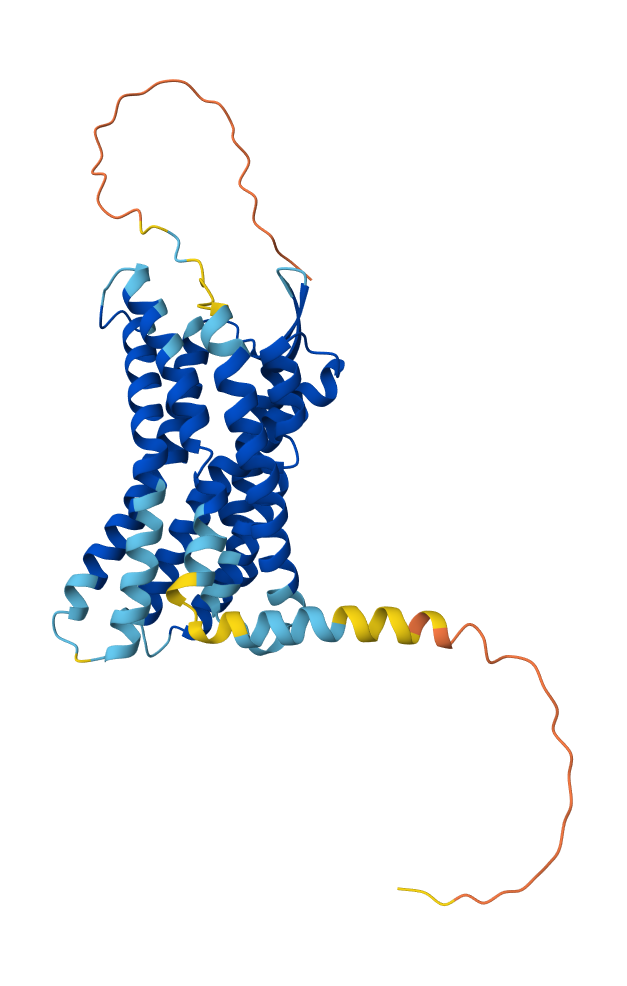

The protein comprises an extracellular N terminus of the protein, seven transmembrane helicies separated by intracellular and extracellular loops, and a intracellular C terminus. The helicies are numbered 1-7, starting from the N terminus. In the image above, the protein is oriented such that the extracellular region is on top and the intracellular region on the bottom, as is conventional in visualization of transmembrane proteins.

--> Describe the model confidence in different parts of the structure. In which parts of the protein is the model confidence highest? In which parts of the protein is the model confidence lowest? In which transmembrane helices is model confidence the lowest?

--> Based on your knowledge of structural determination techniques, explain why model confidence is lower in some parts of the protein.

# Part II. Predicting monomer-peptide complexes

Now let's predict how the peptide binds to CXCR4. Use the [ColabFold v1.5.5: AlphaFold2 using MMseqs2](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb) notebook.

The key fields to set are `query_sequence`, `jobname`, `template_mode`, and `save_to_google_drive`.

* `query_sequence` should include CXCR4 and your peptide sequence, separated by a colon. Because the N and C termini are highly disordered, we will only model 28 to 328 (see below).
* `jobname` should be `Monomer:[Name]`, where `[Name]` is the name of your peptide.
* `template_mode` should be `pdb100`.
* `save_to_google_drive` is below under `Save Settings`. It should be checked.

The sequence of CXCR4 residues 28 to 328 is:
`CFREENANFNKIFLPTIYSIIFLTGIVGNGLVILVMGYQKKLRSMTDKYRLHLSVADLLFVITLPFWAVDAVANWYFGNFLCKAVHVIYTVNLYSSVLILAFISLDRYLAIVHATNSQRPRKLLAEKVVYVGVWIPALLLTIPDFIFANVSEADDRYICDRFYPNDLWVVVFQFQHIMVGLILPGIVILSCYCIIISKLSHSKGHQKRKALKTTVILILAFFACWLPYYIGISIDSFILLEIIKQGCEFENTVHKWISITEALAFFHCCLNPILYAFLGAKFKTSAQHALTSVSRGSSLKI`

--> Look under `Display 3D structure`. Orient your best ranked pose (`rank_num`: 1) with the extracellular region pointed up, intracellular region pointed down, and C terminal helix to the right. Take a screenshot and paste it below.

--> How confident is AlphaFold in the structure of the peptide?

--> [Tarasova, Rice, and Michejda hypothesized](https://doi.org/10.1074/jbc.274.49.34911) that the peptide would displace a helix within the 7TMR. Is your highest-ranked structure consistent with their hypothesis?

--> Upload your rank 1 structure to `Chem456-2024F/exercises/03-Homology_Modeling`.

# Part III. Predicting a ternary complex

[Hitchinson et. al. found CXCR4-2-6 forms a ternary complex](https://doi.org/10.1126/scisignal.aat2214) with CXCR4 and its ligand, the chemokine [CXCL12](https://www.uniprot.org/uniprotkb/P48061/entry).

Let's predict how the structure of your peptide, CXCR4, and the ligand CXCL12. Again, you should use the [ColabFold v1.5.5: AlphaFold2 using MMseqs2](https://colab.research.google.com/github/sokrypton/ColabFold/blob/main/AlphaFold2.ipynb).

As before, the key fields to set are `query_sequence`, `jobname`, `template_mode`, and `save_to_google_drive`.

* `query_sequence` should include CXCR4, CXCL12, and your peptide sequence, separated by a colon. Because the N terminus of CXCR4 may interact with CXCL12, we will model it. However we will not model the C terminus.
* `jobname` should be `Monomer:CXCL12:[Name]`, where `[Name]` is the name of your peptide.
* `template_mode` should be `pdb100`.
* `save_to_google_drive` is below under `Save Settings`. It should be checked.

The sequence of CXCR4 residues 1 to 328 is:
`MEGISIYTSDNYTEEMGSGDYDSMKEPCFREENANFNKIFLPTIYSIIFLTGIVGNGLVILVMGYQKKLRSMTDKYRLHLSVADLLFVITLPFWAVDAVANWYFGNFLCKAVHVIYTVNLYSSVLILAFISLDRYLAIVHATNSQRPRKLLAEKVVYVGVWIPALLLTIPDFIFANVSEADDRYICDRFYPNDLWVVVFQFQHIMVGLILPGIVILSCYCIIISKLSHSKGHQKRKALKTTVILILAFFACWLPYYIGISIDSFILLEIIKQGCEFENTVHKWISITEALAFFHCCLNPILYAFLGAKFKTSAQHALTSVSRGSSLKI`

The sequence of CXCL12 (excluding a 21 residue signaling peptide) is:
`KPVSLSYRCPCRFFESHVARANVKHLKILNTPNCALQIVARLKNNNRQVCIDPKLKWIQEYLEKALNKRFKM`

--> Look under `Display 3D structure`. Orient your best ranked pose (`rank_num`: 1) with the extracellular region pointed up, intracellular region pointed down, and C terminal helix to the right. Take a screenshot and paste it below.

--> Describe the secondary structure of the globular portion of CXCL12.

--> [Saotome et. al.](https://www.biorxiv.org/content/10.1101/2024.02.09.579708v1) solved a cryoEM structure of CXCR4/Gi/CXCL12, but they wrote that "interactions between the globular portion of the ligand and the N-terminus of CXCR4 (chemokine recognition site 1) were unclear." Describe how AlphaFold predicts the N terminus of CXCR4 to interact with the globular portion of CXCL12. What, if any, secondary structure does the N terminus have?

--> How confident is AlphaFold in the structure of the peptide?

--> [Tarasova, Rice, and Michejda hypothesized](https://doi.org/10.1074/jbc.274.49.34911) that the peptide would displace a helix within the 7TMR. Is your highest-ranked structure consistent with their hypothesis?

[Hitchinson et. al. found that CXCR4-2-6 contacts both CXCR4 and CXCL12](https://doi.org/10.1126/scisignal.aat2214). Is your peptide predicted to also contact both proteins?

--> Upload your rank 1 structure to `Chem456-2024F/exercises/03-Homology_Modeling`.